# Stock Market Prediction And Forecasting

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import math
import matplotlib.pyplot as plt

# For time stamps
from datetime import datetime

# Styling
plt.style.use('seaborn-darkgrid')
sb.set_style('whitegrid')

### Importing Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


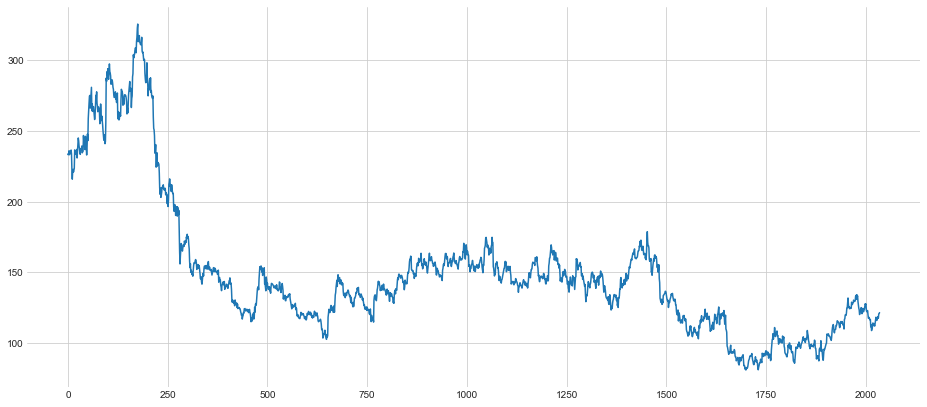

In [6]:
# Historical Graph of the closing price
plt.figure(figsize=(16, 7))
plt.plot(df['Close'])
plt.show()

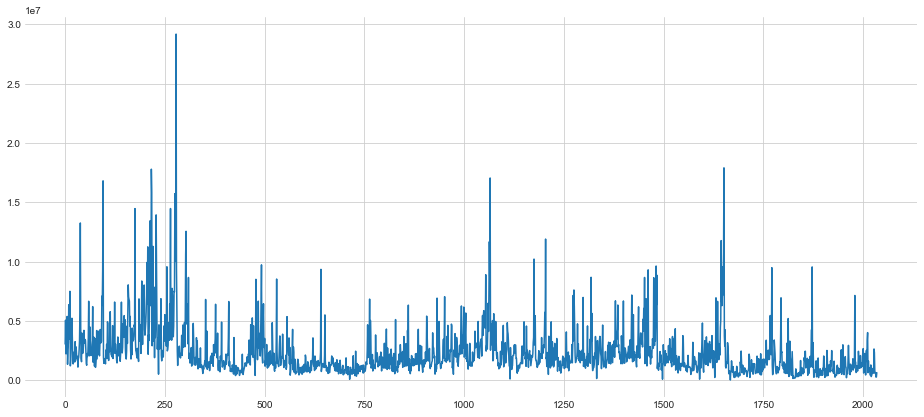

In [7]:
# Volume of stock traded each day
plt.figure(figsize=(16, 7))
plt.plot(df['Total Trade Quantity'])
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df['Close']).reshape(-1,1))

In [9]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

### Splitting Dataset Into Train and Test Data

In [10]:
training_size = int(len(df1)*0.75)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size

1526

In [12]:
test_size

509

In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
X_train, Y_train = create_dataset(train_data, 100)
X_test, Y_test = create_dataset(test_data, 100)

In [15]:
print(X_train.shape), print(Y_train.shape)

(1425, 100)
(1425,)


(None, None)

In [16]:
print(X_test.shape), print(Y_test.shape)

(408, 100)
(408,)


(None, None)

In [17]:
# Reshaping input to [samples, time steps, features] required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
# Importing Tensorflow Module
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=1)

1425/1425 [==============================] - 58s 39ms/step - loss: 0.0030


In [19]:
# Lets predict now and check performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

13/13 [==============================] - 1s 43ms/step


In [20]:
### Calculate Root Mean Squared Error

from sklearn.metrics import mean_squared_error
print("Y Train:",math.sqrt(mean_squared_error(Y_train,train_predict)))
print("Y Test:",math.sqrt(mean_squared_error(Y_test,test_predict)))

Y Train: 163.50165859991546
Y Test: 107.44847230784173


Thank You!